# The Sparks Foundation
## Task2: Color identification in images
## By Nikhil Namboodiri

## Importing libraries

In [1]:
from sklearn.cluster import KMeans              #Kmeans classifier 
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter                  #To extract the count
from skimage.color import rgb2lab, deltaE_cie76  #convert rgb to lab and determine similarity
import os

%matplotlib inline

## Displaying the image in different color formats

Shape: (388, 600, 3)


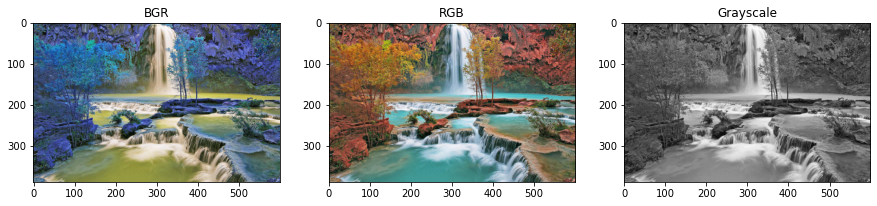

In [2]:
image = cv2.imread('images/waterfall.jpg')
print("Shape: {}".format(image.shape))

plt.figure(figsize=(15,15)) 
plt.subplot(1,3,1)
plt.title("BGR")
plt.imshow(image)                                     #BGR color

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.subplot(1,3,2)
plt.title("RGB")
plt.imshow(image)                                     #RGB color

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.subplot(1,3,3)
plt.title("Grayscale")
plt.imshow(gray_image, cmap='gray')                   #Grey scale

## Resizing the image

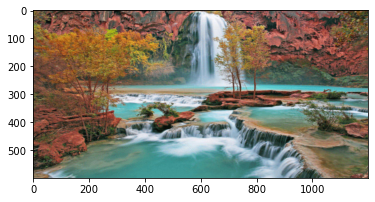

In [3]:
resized_image = cv2.resize(image, (1200, 600))
plt.imshow(resized_image)

## Color identification

In [4]:
# to find the hex value of colors

def rgb_to_hex(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [5]:
# to get image from the respective location

def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [6]:
# to extract the top colors from the image and visualise as a pie chart

def get_colors(image, number_of_colors, show_chart):
    
    image_m = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    image_m = image_m.reshape(image_m.shape[0]*image_m.shape[1], 3)
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(image_m)
    
    counts = Counter(labels)
    # sort to ensure correct color percentage
    counts = dict(sorted(counts.items()))
    
    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [rgb_to_hex(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]
    #actual_colors = [webcolors.hex_to_name(str(i)) for i in hex_colors]

    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    
    return rgb_colors

## Resulting pie chart

[array([ 91.28967466, 101.45643154,  87.65112153]),
 array([145.22065325, 177.7999485 , 185.67226061]),
 array([155.62170332, 101.51560493,  65.28907529]),
 array([ 86.54788453, 142.09744162, 138.57185777]),
 array([49.1497274 , 52.13862153, 40.13660228]),
 array([108.13696179,  72.92965936,  51.770004  ]),
 array([204.5044625 , 216.86312775, 226.76075663]),
 array([171.15578739, 138.54080244, 112.05826564])]

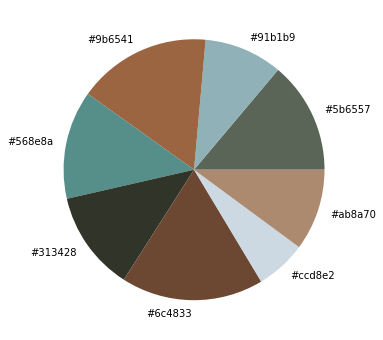

In [7]:
get_colors(get_image('images/waterfall.jpg'), 8, True)

## Displaying images in current folder

In [8]:
IMAGE_DIRECTORY = 'images'
COLORS = {
    'RED': [255,0,0],
    'GREEN': [0, 128, 0],
    'BLUE': [0, 0, 200],
    'YELLOW': [255, 255, 0]
}
images = []

for file in os.listdir(IMAGE_DIRECTORY):
    if not file.startswith('.'):
        images.append(get_image(os.path.join(IMAGE_DIRECTORY, file)))

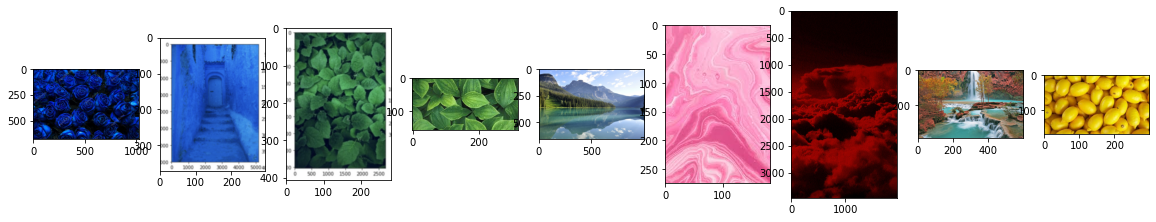

In [9]:
# to display all images in current folder

plt.figure(figsize=(20, 10))
for i in range(len(images)):
    plt.subplot(1, len(images), i+1)
    plt.imshow(images[i])

## Matching images based on color specified

This function match_image_by_color filters all images that match the selected color and extracts the image colors using our previously defined method get_colors in RGB format.

In [10]:
def match_image_by_color(image, color, threshold = 60, number_of_colors = 10): 
    
    image_colors = get_colors(image, number_of_colors, False)
    selected_color = rgb2lab(np.uint8(np.asarray([[color]])))

    select_image = False
    for i in range(number_of_colors):
        curr_color = rgb2lab(np.uint8(np.asarray([[image_colors[i]]])))
        diff = deltaE_cie76(selected_color, curr_color)
        if (diff < threshold):
            select_image = True
    
    return select_image

This function show_selected_images iterates over all images, calls the above function to filter them based on color and displays them on the screen using imshow.

In [11]:
def show_selected_images(images, color, threshold, colors_to_match):
    index = 1    
    for i in range(len(images)):
        selected = match_image_by_color(images[i],color,threshold,colors_to_match)
        if (selected):
            plt.subplot(1, 5, index)
            plt.imshow(images[i])
            index += 1

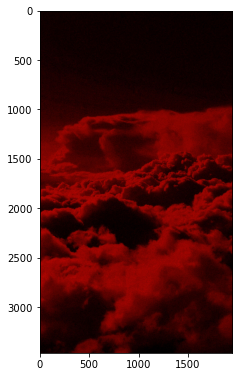

In [12]:
# Search for Red
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['RED'], 60, 5)

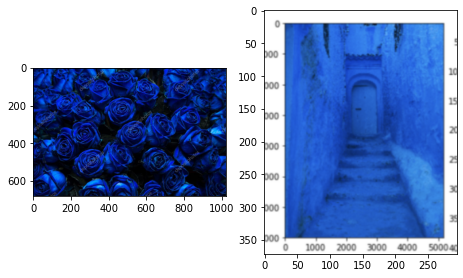

In [13]:
# Search for Blue
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['BLUE'], 60, 5)

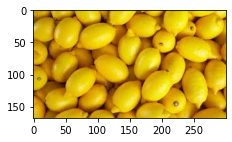

In [14]:
# Search for Yellow
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['YELLOW'], 60, 5)

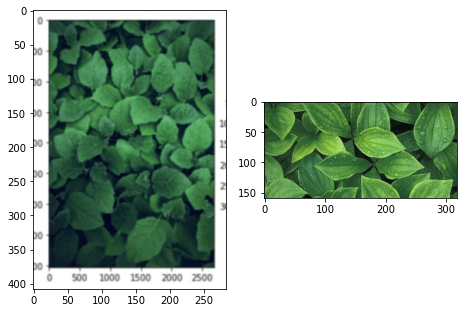

In [15]:
# Search for Green
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['GREEN'], 60, 5)

# Conclusion

In this notebook, we used KMeans to extract majority colors from images. We then used the RGB Values of Colors to identify images from a collection that have that color in them.

# Thank you